# Positive definiteness

Author: [Nipun Batra](https://nipunbatra.github.io/), [Zeel B Patel](https://patel-zeel.github.io/)

In this notebook, we will try and understand the notion of positive definitiveness and positive semi-definitiveness. We will be referring an excellent video from 3Blue1Brown: https://youtu.be/kYB8IZa5AuE

The main concepts in this notebook are:

- Matrix vector product as linear transformation
- Vector dot product


In [14]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib.animation import FuncAnimation

rc('font', size=16)
rc('text', usetex=True)
rc('animation', html='jshtml')

Let us take a vector $\mathbf{v}_1 = [1\;\;\;2]^T$

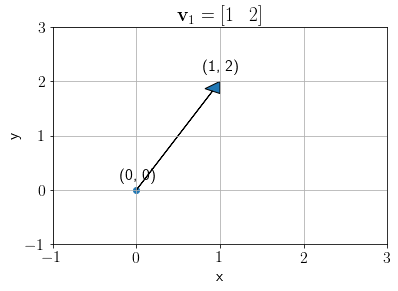

In [15]:
v1 = np.array([1, 2]).reshape(-1,1)

plt.arrow(x=0, y=0, dx=v1[0,0], dy=v1[1,0], shape='full', head_width=0.2, head_length=0.2, length_includes_head=True)
plt.text(0-0.2, 0+0.2, f'({0}, {0})')
plt.text(v1[0,0]-0.2, v1[1,0]+0.2, f'({v1[0,0]}, {v1[1,0]})')
plt.scatter(0, 0)
plt.grid()
plt.ylim((-1, 3))
plt.xlim(-1, 3);
plt.xlabel('x');plt.ylabel('y');
plt.title('$\mathbf{v}_1 = '+f'[{v1[0,0]}\;\;\;{v1[1,0]}]$');

We define a transformation matrix $A$ as below.

In [16]:
A = np.array([[1, 0], [0, 2]])

In [17]:
def plot_transformation(x, A, ax, annotate=False):
    arrow_in = ax.arrow(x=0, y=0, dx=x[0, 0], dy=x[1, 0], shape='full', head_width=0.4, 
                         head_length=0.4, color='green', lw=8, alpha=0.6, length_includes_head=True)
    ax.grid()
    
    # Applying transformation
    Ax = A@x
    
    # Get current min, max
    ymin, ymax = (min(Ax[1], x[1], 0)-2, max(Ax[1], x[1], 0)+1)
    xmin, xmax = (min(Ax[0], x[0], 0)-3, max(Ax[0], x[0], 0)+3)
    
    # Check and update according to previous
    ax.set_ylim(min(ymin, ax.set_ylim()[0]), max(ymax, ax.set_ylim()[1]))
    ax.set_xlim(min(xmin, ax.set_xlim()[0]), max(xmax, ax.set_xlim()[1]))
    
    arrow_out = ax.arrow(x=0, y=0, dx=Ax[0, 0], dy=Ax[1, 0], shape='full', head_width=0.4, 
                          head_length=0.4, color='red', length_includes_head=True)
    if annotate:
        ax.text(0-1, 0+0.2, f'({0}, {0})')
        ax.text(x[0, 0]-1, x[1, 0]+0.2, f'v1=({x[0, 0]}, {x[1, 0]})')
        ax.text(Ax[0, 0]-1, Ax[1, 0]+0.2, f'v1\'=({Ax[0, 0]}, {Ax[1, 0]})')
    ax.legend([arrow_in, arrow_out, ], ['Input','Transformed',], loc='lower right')
    ax.set_aspect('equal')
    ax.set_xlabel('x');ax.set_ylabel('y')
    return Ax

Plotting the transformation.

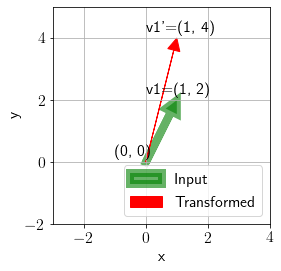

In [18]:
fig, ax = plt.subplots()
Av = plot_transformation(v1, A, ax, annotate=True)

Let us now look at a different input and a different transformation.

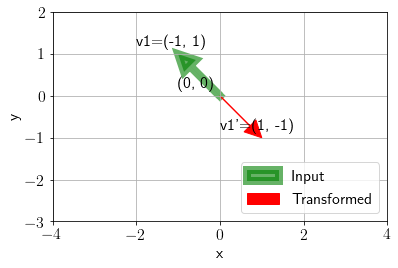

In [19]:
v1 = np.array([-1, 1]).reshape(-1, 1)
A = np.array([[1, 2], [2, 1]])

fig, ax = plt.subplots()
Av = plot_transformation(v1, A, ax, annotate=True)

For the above transformation, it seems that the angle is 180 degrees

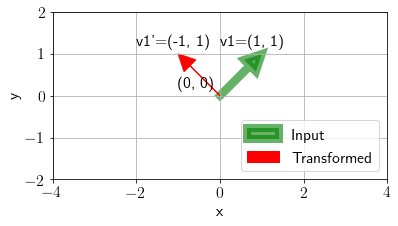

In [20]:
v1 = np.array([1, 1]).reshape(-1,1)
A = np.array([[0, -1], [1, 0]])

fig, ax = plt.subplots()
Av = plot_transformation(v1, A, ax, annotate=True)

In [21]:
def plot_full(v1, A, ax, annotate=False):
    plot_transformation(v1, A, ax, annotate=annotate)
    
    vAv = v1.T@A@v1
    ax.set_title('$\mathbf{v}^TA\mathbf{v} = '+f'{vAv[0,0]}$')

Let us visualize transformations for the following $A$ and check the direction of the transformation.


$$
A = 
\begin{bmatrix}
1 & 0\\
0 & 1
\end{bmatrix}
$$

In [22]:
A = np.array([[1, 0], [0, 1]])
fig, ax = plt.subplots()

def update(x):
    i, j = x
    ax.cla()
    plot_full(np.array([-i, j]).reshape(-1,1), A, ax)
    ax.set_xlim(-6,6)
    ax.set_ylim(-10,6)

frames = []
for i in range(-5, 5, 1):
    for j in range(-5, 5, 1):
        frames.append((i, j))

plt.tight_layout()
anim = FuncAnimation(fig, update, frames)
plt.close()
anim

We can see that $\mathbf{v}^TA\mathbf{v}$ is non-negative in any case and also eigen values of $A$ are positive

Now, we modify $A$ to the following,


$$
A = 
\begin{bmatrix}
1 & 0\\
0 & -1
\end{bmatrix}
$$

In [23]:
A = np.array([[1, 0], [0, -1]])
fig, ax = plt.subplots()

def update(x):
    i, j = x
    ax.cla()
    plot_full(np.array([-i, j]).reshape(-1,1), A, ax)
    ax.set_xlim(-6,6)
    ax.set_ylim(-10,6)

frames = []
for i in range(-5, 5, 1):
    for j in range(-5, 5, 1):
        frames.append((i, j))

plt.tight_layout()
anim = FuncAnimation(fig, update, frames)
plt.close()
anim

We can see that $\mathbf{v}^TA\mathbf{v}$ is negative in some cases and also one of the eigen values of $A$ is negative.

Let us try one more value of $A$ to draw more insights.


$$
A = 
\begin{bmatrix}
1 & -1\\
0 & 2
\end{bmatrix}
$$

In [24]:
A = np.array([[1, -1], [0, 2]])
fig, ax = plt.subplots()

def update(x):
    i, j = x
    ax.cla()
    plot_full(np.array([-i, j]).reshape(-1,1), A, ax)
    ax.set_xlim(-6,6)
    ax.set_ylim(-10,6)

frames = []
for i in range(-5, 5, 1):
    for j in range(-5, 5, 1):
        frames.append((i, j))

plt.tight_layout()
anim = FuncAnimation(fig, update, frames)
plt.close()
anim

What common behaviour is observed in the above behaviour?

* If all eigen values of $A$ are non-negative, $\mathbf{v}^TA\mathbf{v}$ is also non-negative for any $\mathbf{v}$. In this case, $A$ is positive semi definite.
* If any eigen value of $A$ is negative, $\mathbf{v}^TA\mathbf{v}$ is also negative for some $\mathbf{v}$. In this case, $A$ is not positive semi definite.

Why non negative eigen values: https://math.stackexchange.com/questions/1404534/why-does-positive-definite-matrix-have-strictly-positive-eigenvalue